<a href="https://colab.research.google.com/github/Vishnuvardhan172709/Aiml-/blob/main/assignment%204%20part%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficients:
[0.78042672 3.09818541 2.40320667]

Standard Errors:
[0.15608931 0.19180321 0.21530721]

T-Statistics:
[ 4.99987284 16.15293836 11.16175686]
R² score: 0.7925888799947343


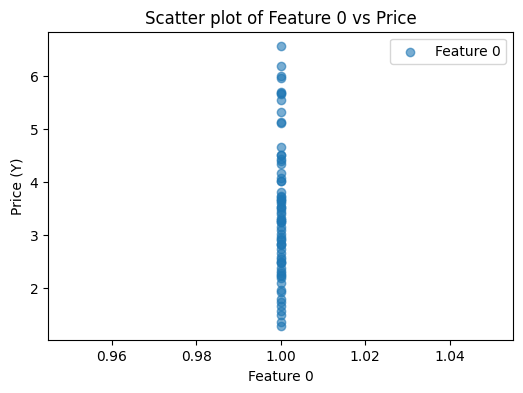

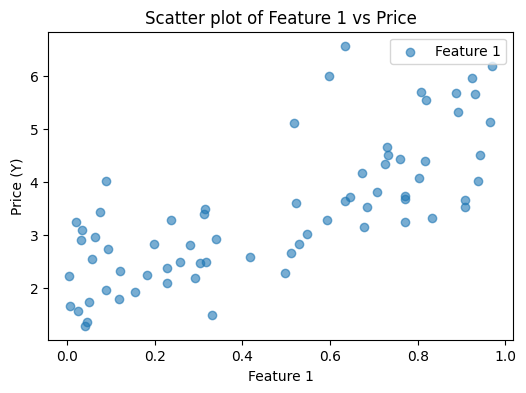

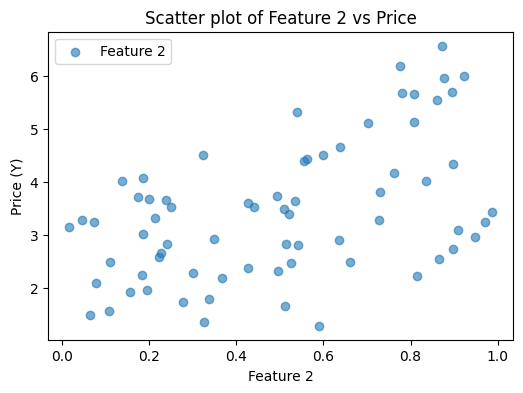

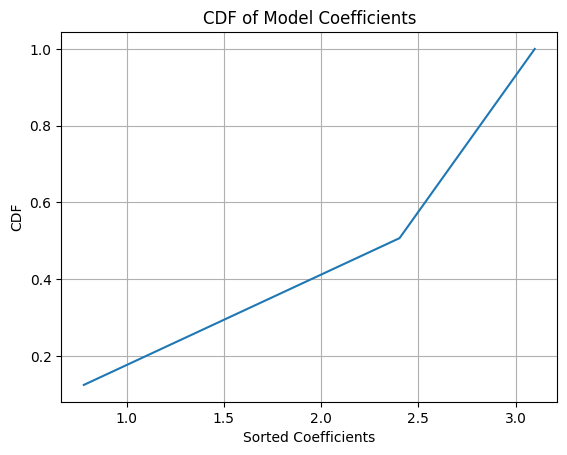

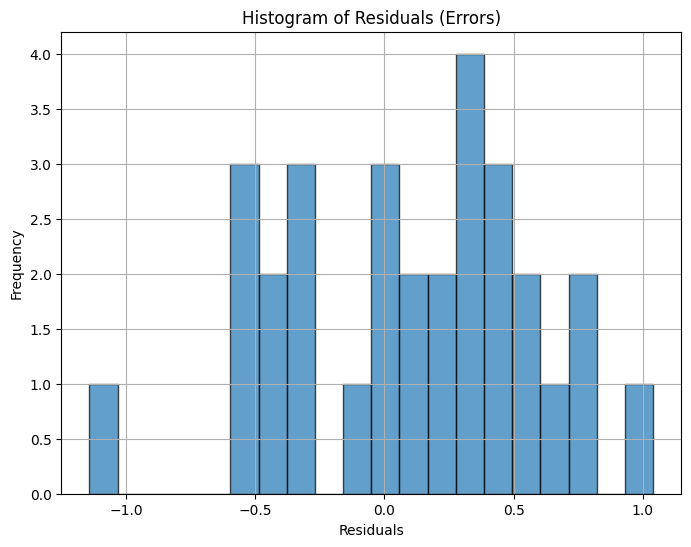

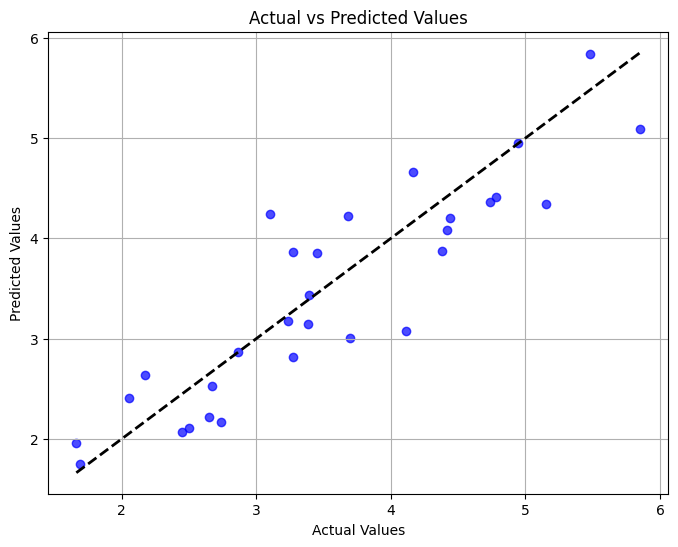

Mean Absolute Error (MAE): 0.4180576304458857
Sum of Squared Errors (SSE): 7.481273200616836
Root Mean Squared Error (RMSE): 0.4993753832077574


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)
X = np.random.rand(100, 2)
Y = 3 * X[:, 0] + 2 * X[:, 1] + 1 + np.random.randn(100) * 0.5

X = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = sm.OLS(Y_train, X_train)
results = model.fit()

coefficients = results.params
standard_errors = results.bse
t_statistics = coefficients / standard_errors

print("Coefficients:")
print(coefficients)
print("\nStandard Errors:")
print(standard_errors)
print("\nT-Statistics:")
print(t_statistics)

linreg = LinearRegression()
linreg.fit(X_train[:, 1:], Y_train)

Y_pred = linreg.predict(X_test[:, 1:])

r2 = r2_score(Y_test, Y_pred)
print(f"R² score: {r2}")

for i in range(X.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train[:, i], Y_train, label=f"Feature {i}", alpha=0.6)
    plt.xlabel(f"Feature {i}")
    plt.ylabel("Price (Y)")
    plt.title(f"Scatter plot of Feature {i} vs Price")
    plt.legend()
    plt.show()

sorted_coefficients = np.sort(coefficients)
cdf = np.cumsum(sorted_coefficients) / np.sum(sorted_coefficients)
plt.plot(np.sort(sorted_coefficients), cdf)
plt.xlabel('Sorted Coefficients')
plt.ylabel('CDF')
plt.title('CDF of Model Coefficients')
plt.grid(True)
plt.show()

residuals = Y_test - Y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of Residuals (Errors)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

mae = mean_absolute_error(Y_test, Y_pred)
sse = np.sum(residuals ** 2)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Sum of Squared Errors (SSE): {sse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")